# Practice Numba cuda 4





__1)__ This problem investigates unsteady heat conduction in a square plate. The initial temperature distribution in the plate is given; the faces of the plate are insulated; and the edges of the plate are kept in contact with an ice bath. The mathematical model is as follows:

$$\frac{\partial u}{\partial t} = \frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2} \qquad \text{ on } x,y \in [0,1], t \geq 0$$

Initial conditions: $u(x,y,0) =  sin(2 \pi x) sin(\pi y)$

Boundary conditions: $u(0,y,t) = u(1,y,t) = u(x,0,t) = u(x,1,t) = 0 \; \forall \; t \geq 0$

Your mission is to write numba code to implement a parallelized finite-difference time-stepping scheme to simulate unsteady heat conduction in the plate. Use a central difference stencil of radius 1 for the spatial derivatives and a simple forward difference scheme for the time derivative.

A suitable update formula can be obtained from:
```
(u[i,j,k+1] - u[i,j,k])/dt = (1/4*h^2)*(-4*u[i,j,k] + u[i-1,j,k] 
                            + u[i+1,j,k] + u[i,j-1,k] + u[i,j+1,k])
```

where `i` and `j` index the Cartesian grid of points with uniform spacing `h` and `k` indexes the discrete times with spacing `dt`.

You should write a kernel function that takes the current array of temperatures as input and computes (and saves to an output array) the temperatures 1 time step later. The kernel should be launched on a 2D computational grid so that each thread computes the temperature at the next time for the corresponding node on the spatial grid. You should have a `for()` statement that loops over the time index and calls the kernel function to compute the updated temperature distribution.

Particular tasks:

a) Determine the time, $t_{2}$, at which the maximum temperature has decreased by a factor of $e^{-2}$ from the original maximum value.

b) Plot the temperature distribution $u(x,y,t_{2})$.

c) Determine the largest time step, $\Delta t_{max}$, you can use to compute a reasonable approximation of $u(x,y,t_{2})$ for a $150 \times 150$ spatial grid; and provide a plot of the result when $\Delta t > \Delta t_{max}$.


__2)__
Using numba, implement a parallel code for evaluating a definite integral on a finite 1D domain using composite Simpson's rule and Richardson extrapolation. Your code should do the following:

- Evaluate the integrand at a uniform grid of points across the integration domain, and store the results in a numpy array.
- Perform the stencil computation corresponding to composite Simpson's rule.
- Perform a reduction on the panel contributions to provide an initial estimate of the integral value.
- Perform the Simpson's rule stencil computation (ignoring every other point), and a compute a reduction of the values.
- Compute the improved integral value provided by Richardson extrapolation.

The Sine-Integral function $Si(x)$, which you may have encountered in your study of Fourier series of discontinuous functions, is defined by:

$$Si(x) = \int_0^x{\frac{sin(t)}{t}dt}$$

Use your code to evaluate $Si(50)$ based on evaluation of the integrand $\frac{sin(t)}{t}$ at $6001$ points, and estimate the accuracy of your result.

Note: Be careful of 0/0 as this will produce a Nan value.

__3)__ This problem involves using the Monte Carlo method presented in class to compute integrals over multi-dimensional domains.

Let's start by defining terminology for some generalizations of the sphere/ball using the $p$-norm:

$$ \|x\|_p = \big(x_1^p + x_2^p + \ldots +x_n^p\big)^{1/p} = \big( \sum_{i=1}^n x_i^p \big)^{1/p}$$

We will be interested in cases where the the norm has value $1$, so you should not need to actually compute the $p^{th}$ roots.

The ball in $n$-dimensions:
$$B_p(n) = \{ x \in \mathbb{R}^{n} : \|x\|_p<1 \}$$

The sphere (spherical shell) in $n$-dimensions:
$$S_p(n) = \{ x \in \mathbb{R}^{n+1} : \|x\|_p=1 \}$$

For this part of the question consider $p=2$, so the interior of the domain of integration is implicitly defined by 

$$f_2(x_1,x_2,x_3) = x_1^2 + x_2^2 + x_3^2 = \sum_{i=1}^3 x_i^2 \leq 1$$

a) Use the Monte Carlo method to compute the volume and moment of intertia about the $x_1$-axis of the unit $3$-ball, $B_2(3)$ (a.k.a. sphere). Plot the error $E$ in your result as a function of the number of sample points $N$, and give and approximate version of $E(N)$.

For computing volume, the integrand is $g(x_1,x_2,x_3) \equiv 1$. <br>For moment of inertia, the integrand is the square of the distance from the $x_1$ axis; i.e. $g(x_1,x_2,x_3) = x_2^2+x_3^2$.

b) Repeat part a for $S_2(3)$ (a.k.a. the unit spherical shell). Explain how you do this and compare with what is involved in doing part a).



__4)__ Write numba code to create a 3D parallel implementation of the grid-based integration method, and re-compute the integrals from question 3 using your grid-based integration code with grid spacings $h \approx 1/64$ and $h \approx 1/128$.


maximum temperature has decreased by a factor of exp(-2) from the original maximum value
Time =  0.002940029400294003


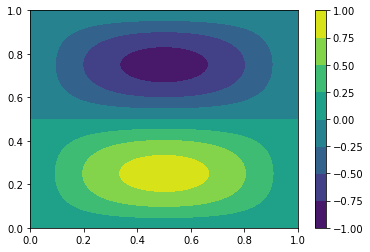

temperature distribution plot of the result when t >  t_max
Time =  0.002940029400294003


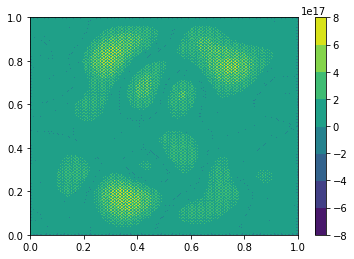

Simpson's rule: 1.5513585090702129 
Difference: 0.0002585634157230565
Richardson extrapolation: 1.551358879793287 
Difference: 0.00025819269264903966


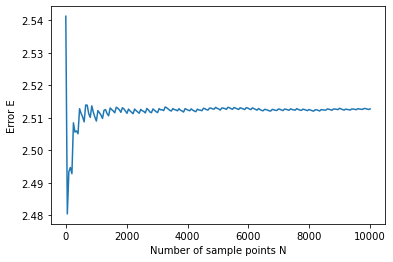

Moment Carlo Vol shows 4.1890726


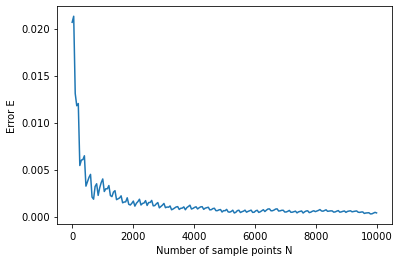

Monte Carlo MOI shows 1.6718122
part b)
Vol Unit Spherical Shell shows 0.0
MOI Unit Spherical Shell shows 0.0
It does not shows the result since it cannot sampled out each point

For h = 1/64
Moment Carlo Vol is 4.1887902047863905. 
New result shows 4.188221

For h = 1/128
Moment Carlo Vol is 4.1887902047863905. 
New result shows 4.1879582

For h = 1/64
Monte Carlo MOI is 1.6755160819145563. 
New result shows 1.6751361

For h = 1/128
Monte Carlo MOI is 1.6755160819145563. 
New result shows 1.6749613

For h = 1/64
Vol Unit Spherical Shell is 12.566370614359172. 
New result shows 12.56462

For h = 1/128
Vol Unit Spherical Shell is 12.566370614359172. 
New result shows 12.564553

For h = 1/64
MOI Unit Spherical Shell is 8.377580409572781. 
New result shows 8.37688

For h = 1/128
MOI Unit Spherical Shell is 8.377580409572781. 
New result shows 8.3755665


In [1]:
import numpy as np
from numba import cuda, float32, float64
from numba.cuda.random import create_xoroshiro128p_states, xoroshiro128p_uniform_float32
import matplotlib.pyplot as plt
import math



TPB = 8
RAD = 1
SH_N = 10

@cuda.reduce
def max_kernel(a, b):
    return max(a,b)

@cuda.reduce
def sum_kernel(a, b):
    return a + b

@cuda.jit
def heat_step(d_u, d_out, stencil, dt, h):
	'''
	u: input device array
	out: output device array
	stencil: derivative stencil coefficients
	t: current time step
	'''
	i, j = cuda.grid(2)
	x, y = d_u.shape
	if i >= x or j >= y: return
	NX, NY = cuda.blockDim.x, cuda.blockDim.y
	t_i, t_j = cuda.threadIdx.x, cuda.threadIdx.y
	sh_i, sh_j = t_i + RAD, t_j + RAD
	sh_u = cuda.shared.array(shape=(SH_N, SH_N), dtype=float32)
	sh_u[sh_i, sh_j] = d_u[i, j]

	if t_i < RAD:
		sh_u[sh_i - RAD, sh_j] = d_u[i - RAD, j]
		sh_u[sh_i + NX, sh_j] = d_u[i + NX, j]

	if t_j < RAD:
		sh_u[sh_i, sh_j - RAD] = d_u[i, j - RAD]
		sh_u[sh_i, sh_j + NY] = d_u[i, j + NY]
	cuda.syncthreads()
	if i > 0 and j > 0 and i < x - RAD and j < y - RAD:
		d_out[i,j] = sh_u[sh_i, sh_j] + (dt / h ** 2) * (sh_u[sh_i, sh_j - 1] + sh_u[sh_i - 1, sh_j] + (-4) * sh_u[sh_i, sh_j] + sh_u[sh_i + 1, sh_j] + sh_u[sh_i, sh_j + 1])


@cuda.jit
def integrate_kernel(y, out, quad):
	'''
	y: input device array
	out: output device array
	quad: quadrature stencil coefficients
	'''
	i = cuda.grid(1)
	if i < out.size:
		out[i] = y[2*i] * quad[0] + y[2*i+1] * quad[1] + y[2*i+2] * quad[2]


def integrate(y, quad):
	'''
	y: input array
	quad: quadrature stencil coefficients
	'''
	TPB = 64
	n = int((len(y) - 1) / 2)
	d_y = cuda.to_device(y)
	d_out = cuda.device_array(n, dtype=np.float32)
	gridDim = (n + TPB - 1) // TPB
	blockDim = TPB
	integrate_kernel[gridDim, blockDim](d_y, d_out,  quad)
	return d_out.copy_to_host()

@cuda.jit
def monte_carlo_kernel_sphere_intertia(rng_states, iters, out):
	'''
	rng_states: rng state array generated from xoroshiro random number generator
	iters: number of monte carlo sample points each thread will test
	out: output array
	'''
	i = cuda.grid(1)
	count = 0
	for _ in range(iters):
		x1 = xoroshiro128p_uniform_float32(rng_states, i)
		x2 = xoroshiro128p_uniform_float32(rng_states, i)
		x3 = xoroshiro128p_uniform_float32(rng_states, i)
		if x1**2 + x2**2 + x3**2 < 1:
			count += x2**2 + x3**2
	out[i] = 2.0 ** 3 * count / iters

@cuda.jit
def monte_carlo_kernel_sphere_vol(rng_states, iters, out):
	i = cuda.grid(1)
	count = 0
	for _ in range(iters):
		x1 = xoroshiro128p_uniform_float32(rng_states, i)
		x2 = xoroshiro128p_uniform_float32(rng_states, i)
		x3 = xoroshiro128p_uniform_float32(rng_states, i)
		if x1**2 + x2**2 + x3**2 < 1:
			count += 1
	out[i] = 2.0 ** 3 * count / iters

@cuda.jit
def monte_carlo_kernel_shell_intertia(rng_states, iters, out):
	i = cuda.grid(1)
	count = 0
	for _ in range(iters):
		x1 = xoroshiro128p_uniform_float32(rng_states, i)
		x2 = xoroshiro128p_uniform_float32(rng_states, i)
		x3 = xoroshiro128p_uniform_float32(rng_states, i)
		if x1**2 + x2**2 + x3**2 == 1:
			count += x2 ** 2 + x3 ** 2
	out[i] = 2 ** 3 * count / iters

@cuda.jit
def monte_carlo_kernel_shell_vol(rng_states, iters, out):
	i = cuda.grid(1)
	count = 0
	for _ in range(iters):
		x1 = xoroshiro128p_uniform_float32(rng_states, i)
		x2 = xoroshiro128p_uniform_float32(rng_states, i)
		x3 = xoroshiro128p_uniform_float32(rng_states, i)
		if x1**2 + x2**2 + x3**2 == 1:
			count += 1
	out[i] = 2 ** 3 * count / iters


def monte_carlo(threads, blocks, iters, kernel, seed = 1):
	'''
	threads: number of threads to use for the kernel
	blocks: number of blocks to use for the kernel
	iters: number of monte carlo sample points each thread will test 
	kernel: monte_carlo kernel to use
	seed: seed used when generating the random numbers (if the seed is left at one the number generated will be the same each time)
	'''
	# threads_per_block = 64
	# blocks = 24
	# rng_states = create_xoroshiro128p_states(threads_per_block * blocks, seed=1)
	# out = np.zeros(threads_per_block * blocks, dtype=np.float32)
	rng_states = create_xoroshiro128p_states(threads * blocks, seed)
	out = np.zeros(threads * blocks, dtype=np.float32)
	if kernel == 'Moment Carlo Vol':
		monte_carlo_kernel_sphere_vol[blocks, threads](rng_states, iters, out)
	elif kernel == 'Monte Carlo MOI':
		monte_carlo_kernel_sphere_intertia[blocks, threads](rng_states, iters, out)
	elif kernel == 'Vol Unit Spherical Shell':
		monte_carlo_kernel_shell_vol[blocks, threads](rng_states, iters, out)
	elif kernel == 'MOI Unit Spherical Shell':
		monte_carlo_kernel_shell_intertia[blocks, threads](rng_states, iters, out)
	else:
		print("None")
	return np.mean(out)

@cuda.jit(device = True)
def chi(f, levelset):
	'''
	f: function value
	levelset: surface levelset
	'''
	return f <= levelset

@cuda.jit
def grid_integrate_sphere_intertia(y, out, stencil):
	'''
	y: input device array
	out: output device array
	stencil: derivative stencil coefficients
	'''
	i, j, k = cuda.grid(3)
	dims = y.shape
	if i < dims[0] and j < dims[1] and k < dims[2]:
		g = y[i, j, k] - (i - dims[0] // 2)**2 * stencil**2
		out[i, j, k] = chi(y[i, j, k], 1) * g * stencil ** 3

@cuda.jit
def grid_integrate_sphere_vol(y, out, stencil):
	i, j, k = cuda.grid(3)
	dims = y.shape
	if i < dims[0] and j < dims[1] and k < dims[2]:
		out[i, j, k] = chi(y[i, j, k], 1) * stencil ** 3



@cuda.jit
def grid_integrate_shell_intertia(y, out, stencil):
	i, j, k = cuda.grid(3)
	dims = y.shape
	if i < dims[0] - 1 and j < dims[1] - 1 and k < dims[2] - 1 and i > 0 and j > 0 and k > 0:
		g = y[i, j, k] - (i - dims[0] // 2) ** 2 * stencil ** 2
		d_f_x = (y[i + 1, j, k] - y[i - 1, j, k])
		d_f_y = (y[i, j + 1, k] - y[i, j - 1, k])
		d_f_z = (y[i, j, k + 1] - y[i, j, k - 1])
		d_chi_x = (chi(y[i + 1, j, k], 1) - chi(y[i - 1, j, k], 1))
		d_chi_y = (chi(y[i, j + 1, k], 1) - chi(y[i, j - 1, k], 1))
		d_chi_z = (chi(y[i, j, k + 1], 1) - chi(y[i, j, k - 1], 1))
		out[i, j, k] = - g * (d_chi_x * d_f_x + d_chi_y * d_f_y + d_chi_z * d_f_z) / (d_f_x ** 2 + d_f_y ** 2 + d_f_z ** 2) ** 0.5 * stencil ** 2 / 2
	elif i < dims[0] and j < dims[1] and k < dims[2]: out[i, j, k] = 0

@cuda.jit
def grid_integrate_shell_vol(y, out, stencil):
	i, j, k = cuda.grid(3)
	dims = y.shape
	if i < dims[0] - 1 and j < dims[1] - 1 and k < dims[2] - 1 and i > 0 and j > 0 and k > 0:
		d_f_x = (y[i + 1, j, k] - y[i - 1, j, k])
		d_f_y = (y[i, j + 1, k] - y[i, j - 1, k])
		d_f_z = (y[i, j, k + 1] - y[i, j, k - 1])
		d_chi_x = (chi(y[i + 1, j, k], 1) - chi(y[i - 1, j, k], 1))
		d_chi_y = (chi(y[i, j + 1, k], 1) - chi(y[i, j - 1, k], 1))
		d_chi_z = (chi(y[i, j, k + 1], 1) - chi(y[i, j, k - 1], 1))
		out[i, j, k] = - (d_chi_x * d_f_x + d_chi_y * d_f_y + d_chi_z * d_f_z) / (d_f_x ** 2 + d_f_y ** 2 + d_f_z ** 2) ** 0.5 * stencil ** 2 / 2
	elif i < dims[0] and j < dims[1] and k < dims[2]: out[i, j, k] = 0


def grid_integrate(kernel, h):
	'''
	kernel: grid integration kernel to use
	'''
	n = int(2 / h + 1 + 20)
	x = np.linspace(-1 - 10 * h, 1 + 10 * h, n)
	u = np.zeros([n, n, n], dtype=np.float32)
    # d_u = cuda.to_device(u)
    # d_out = cuda.to_device(u)
    # dims = u.shape
    # gridSize = [(dims[0]+TPB-1)//TPB, (dims[1]+TPB-1)//TPB]
    # blockSize = [TPB, TPB]
	d_x = cuda.to_device(x)
	d_u = cuda.to_device(u)
	d_out = cuda.to_device(u)
	gridSize = [(n + TPB - 1) // TPB, (n + TPB - 1) // TPB, (n + TPB - 1) // TPB]
	blockSize = [TPB, TPB, TPB]
	ker_init[gridSize, blockSize](d_u, d_out, d_x)
	kernel[gridSize, blockSize](d_u, d_out, h)
	d_flattened = cuda.devicearray.DeviceNDArray(shape=d_out.size, strides=(d_out.dtype.itemsize,), dtype=d_out.dtype, gpu_data=d_out.gpu_data)
	return sum_kernel(d_flattened)

def Si(x):
    if x == 0:
        return 1
    return np.sin(x)/float(x)

def RicharsonRecur(f, x, h, n):
    if n <= 2:
        return float(f(x+h)-f(x-h))/(2*h)
    else:
        return float(2**(n-2)*RicharsonRecur(f, x, h, n-2)-RicharsonRecur(f, x, 2*h, n-2))/(2**(n-2)-1)


def iter_monte_carlo(t_range, threads, blocks, kernel, seed =1):
	# i = 0
	result = []
	for n in t_range:
		temp = monte_carlo(threads, blocks, n, kernel, seed=1)
		result.append((np.abs(temp - 8 / 15 * np.pi)))
		# i += 1
	return result

@cuda.jit
def ker_init(u, out, x):
	# i = cuda.grid(1)
	# if i < out.size:
	# 	out[i] = y[2*i] * quad[0] + y[2*i+1] * quad[1] + y[2*i+2] * quad[2]
	i, j, k = cuda.grid(3)
	dims = out.shape
	if i < dims[0] and j < dims[1] and k < dims[2]:
		u[i, j, k] = x[i]**2 + x[j]**2 + x[k]**2
		out[i, j, k] = u[i, j, k]

if __name__ == '__main__':

	# problem1
	#A suitable update formula can be obtained from:
	# (u[i,j,k+1] - u[i,j,k])/dt = (1/4*h^2)*(-4*u[i,j,k] + u[i-1,j,k] 
                            # + u[i+1,j,k] + u[i,j-1,k] + u[i,j+1,k])
	# 1b)
	NX, NY = 150, 150
	t = 1
	dt = 0.00001
	
	x = np.linspace(0., 1.0, NX)
	y = np.linspace(0., 1.0, NY)
	h = x[1] - x[0]
	
	# Initial conditions:
	ui = np.zeros([NX, NY], dtype=np.float32)
	for i in range(NX):
		for j in range(NY):
			ui[i, j] = math.sin(2 * np.pi * x[i]) * math.sin(np.pi * y[j]) 

	# Boundary conditions
	u = 0
	ui[0, :] = 0
	ui[NX - 1, :] = 0
	ui[:, 0] = 0
	ui[:, NY - 1] = 0
	i, j = ui.shape

	max_temp = np.max(ui)
	threshold = (1 - np.exp(-2)) * max_temp
	d_u = cuda.to_device(ui)
	d_out = cuda.to_device(ui)
	iters = math.ceil(t/dt)
	t = np.linspace(0, dt * iters, iters)
	gridSize = ((i + TPB - 1) // TPB, (j + TPB - 1) // TPB)
	blockSize = (TPB, TPB)
	for k in range(iters):
		heat_step[gridSize, blockSize](d_u, d_out, 1, dt, h)
		d_u = d_out
		if np.max(d_u) < threshold:
			tf = t[k] 
			break # max tem decreased
	u = d_u.copy_to_host()
	print(('maximum temperature has decreased by a factor of exp(-2) from the original maximum value'))
	print('Time = ', tf)
	plt.figure()
	X, Y = np.meshgrid(x, y)
	cp = plt.contourf(X, Y, u)
	# plt.title('maximum temperature has decreased by a factor of exp(-2) from the original maximum value')
	plt.colorbar(cp)
	plt.show()
	
	# 1c)
	# Initial conditions:
	ui = np.zeros([NX, NY], dtype=np.float32)
	for i in range(NX):
		for j in range(NY):
			ui[i, j] = math.sin(2 * np.pi * x[i]) * math.sin(np.pi * y[j]) 

	# Boundary conditions
	ui[0, :] = 0
	ui[NX - 1, :] = 0
	ui[:, 0] = 0
	ui[:, NY - 1] = 0
	i, j = ui.shape
	max_temp = np.max(ui)
	threshold = (1 - np.exp(-2)) * max_temp
	tc = 0.002940
	dt_max = 0.000012
	dt = dt_max + 0.000001
	d_u = cuda.to_device(ui)
	d_out = cuda.to_device(ui)
	iters = math.ceil(tc/dt)
	tc = np.linspace(0, dt * iters, iters)
	gridSize = ((i + TPB - 1) // TPB, (j + TPB - 1) // TPB)
	blockSize = (TPB, TPB)
	for k in range(iters):
		heat_step[gridSize, blockSize](d_u, d_out, 1, dt, h)
		d_u = d_out
		if np.max(d_u) < threshold:
			tf = tc[k] 
			break 
	umax = d_u.copy_to_host()
	print('temperature distribution plot of the result when t >  t_max')
	print('Time = ', tf)
	plt.figure()
	cp_c = plt.contourf(X,Y,umax)
	plt.colorbar(cp_c)
	# plt.title('temperature distribution plot of the result when t >  t_max')
	plt.show()



	# Problem2 
	# a Evaluating a definite integral on a finite 1d domain using 
	# Simpson's rule and Richardson extrapolation
	# integrand at 6001 pointsEstimate the accuracy of your result.

	# - Evaluate the integrand at a uniform grid of points across the integration domain, and store the results in a numpy array.
	# - Perform the stencil computation corresponding to composite Simpson's rule.
	# - Perform a reduction on the panel contributions to provide an initial estimate of the integral value.
	# - Perform the Simpson's rule stencil computation (ignoring every other point), and a compute a reduction of the true_value.
	# - Compute the improved integral value provided by Richardson extrapolation.
	si_50 = 1.551617072485936
	t = 50
	points = 6001
	quad = np.array([1, 4, 1])
	# Simpson\'s rule
	h = t/float(points)
	arr = np.linspace(0, t, points)
	for i in range(len(arr)):
		arr[i] = Si(arr[i])
	resArr = integrate(arr, quad)
	res = 0
	for i in resArr:
		res += i
	result_1 = res*h/3.0
	error_1 = np.abs(si_50 - result_1)
	print('Simpson\'s rule: ' + str(result_1) + ' \nDifference: ' + str(error_1))

	# Richardson extrapolation
	h = t/float(points)
	arr = np.linspace(0, t, points)
	arrRichar = np.zeros(2*points)
	for i in range(len(arr)):
		arrRichar[2*i] = Si(arr[i])
		arrRichar[2*i+1] = arrRichar[2*i] + h/2.0*RicharsonRecur(Si, arr[i], h, 2)
	arrRichar[-1] = Si(arr[-1])
	resArr = integrate(arrRichar, quad)
	res = 0
	for i in resArr:
		res += i
	result_2 = res*h/2.0/3.0
	error_1 = np.abs(si_50 - result_2)
	print('Richardson extrapolation: ' + str(result_2) + ' \nDifference: ' + str(error_1))
	

	# Problem3
	iters = 200
	threads = 64
	blocks = 64
	trange = np.linspace(1, 10000, iters)
	kernel_a = ['Moment Carlo Vol', 'Monte Carlo MOI']
	for kernel in kernel_a:
		ker_to_monte = monte_carlo(threads, blocks, iters, kernel, seed=1)
		result = iter_monte_carlo(trange, threads, blocks, kernel, seed =1)
		plt.figure()
		plt.plot(trange, result)
		plt.xlabel('Number of sample points N')
		plt.ylabel('Error E')
		plt.show()
		print(kernel, 'shows', ker_to_monte)
	print('part b)')
	# part b)
	kernel_b = ['Vol Unit Spherical Shell', 'MOI Unit Spherical Shell']
	for kernel in kernel_b:
		ker_to_monte = monte_carlo(threads, blocks, iters, kernel, seed=1)
		result = iter_monte_carlo(trange, threads, blocks, kernel, seed =1)
		print(kernel, 'shows', ker_to_monte)
	print('It does not shows the result since it cannot sampled out each point')


	# Problem4
	# Write numba code to create a 3D parallel implementation of the grid-based 
	# integration method, and re-compute the integrals from question 3
	trange = np.linspace(1,10000,iters)
	conditions = kernel_a + kernel_b
	cal_val = [4 * np.pi / 3, 8 * np.pi / 15, 4 * np.pi, 8 * np.pi / 3]
	kernels = [grid_integrate_sphere_vol, grid_integrate_sphere_intertia, grid_integrate_shell_vol, grid_integrate_shell_intertia]	
	grid_spacing = [1/64, 1/128]
	for i in range(len(conditions)):
		for h in grid_spacing:
			if h is 1/64: print('\nFor h = 1/64')
			elif h is 1/128: print('\nFor h = 1/128')
			result = grid_integrate(kernels[i], h)
			print(conditions[i] + ' is ' + str(cal_val[i]) + '. \nNew result shows ' + str(result))

